In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df=pd.read_csv("ETF_20_RAW_DATA.csv") # Loding dataset
df

C:\Users\mohni\AppData\Local\Temp\ipykernel_19752\1427229743.py:1: DtypeWarning: Columns (6,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("ETF_20_RAW_DATA.csv") # Loding dataset


,Unnamed: 0,ticker,name,sector,asset_class,market_value,weight,notional_value,shares,price,location,exchange,currency,fx_rate,market_currency,accrual_date,etfname,date
0,0,MSFT,MICROSOFT CORP,Information Technology,Equity,"32,073,812,667.09",6.94,"32,073,812,667.09","77,262,093.00",415.13,United States,NASDAQ,USD,1.0,USD,-,IVV,20240531
1,1,AAPL,APPLE INC,Information Technology,Equity,"29,016,596,831.75",6.28,"29,016,596,831.75","150,931,583.00",192.25,United States,NASDAQ,USD,1.0,USD,-,IVV,20240531
2,2,NVDA,NVIDIA CORP,Information Technology,Equity,"28,157,195,779.87",6.1,"28,157,195,779.87","25,683,139.00","1,096.33",United States,NASDAQ,USD,1.0,USD,-,IVV,20240531
3,3,AMZN,AMAZON COM INC,Consumer Discretionary,Equity,"16,770,160,785.84",3.63,"16,770,160,785.84","95,047,386.00",176.44,United States,NASDAQ,USD,1.0,USD,-,IVV,20240531
4,4,META,META PLATFORMS INC CLASS A,Communication,Equity,"10,679,264,234.73",2.31,"10,679,264,234.73","22,876,131.00",466.83,United States,NASDAQ,USD,1.0,USD,-,IVV,20240531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228776,228776,ARD,ARDAGH GROUP SA CLASS A,Materials,Equity,"88,987.41",0.0,"88,987.41","12,001.00",7.42,Luxembourg,New York Stock Exchange Inc.,USD,1,USD,-,IWB,20240612
228777,228777,-,ESC GCI LIBERTY INC SR ESCROW,Communication,Equity,0.7,0.0,0.7,"70,458.00",0,United States,NASDAQ,USD,1,USD,-,IWB,20240612
228778,228778,ETD_USD,ETD USD BALANCE WITH R30382,Cash and/or Derivatives,Cash,3.12,0.0,3.12,3,100,United States,-,USD,1,USD,1-Jan-00,IWB,20240612
228779,228779,FAM4,S&P MID 400 EMINI JUN 24,Cash and/or Derivatives,Futures,0,0.0,"5,022,650.00",17,"2,954.50",-,Index And Options Market,USD,1,USD,-,IWB,20240612


In [3]:
df.info() # overview about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228781 entries, 0 to 228780
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       228781 non-null  int64 
 1   ticker           228763 non-null  object
 2   name             228781 non-null  object
 3   sector           228781 non-null  object
 4   asset_class      228781 non-null  object
 5   market_value     228781 non-null  object
 6   weight           228781 non-null  object
 7   notional_value   228781 non-null  object
 8   shares           228781 non-null  object
 9   price            228781 non-null  object
 10  location         228781 non-null  object
 11  exchange         228781 non-null  object
 12  currency         228781 non-null  object
 13  fx_rate          228781 non-null  object
 14  market_currency  228781 non-null  object
 15  accrual_date     228781 non-null  object
 16  etfname          228781 non-null  object
 17  date      

In [4]:
etf_names=df['etfname'].unique()
list(etf_names) # ETF List 

['IVV',
 'IEFA',
 'IWF',
 'IJH',
 'IEMG',
 'IJR',
 'IWM',
 'ITOT',
 'IWD',
 'EFA',
 'IVW',
 'IXUS',
 'QUAL',
 'ACWI',
 'EEM',
 'USMV',
 'DGRO',
 'IVE',
 'IWR',
 'IWB']

In [96]:
def get_holdings(etfname): # function to get the holding of the particular ETF
    new_df=df[df["etfname"]==etfname]
    return list(new_df['ticker'].unique())


In [6]:
holding_list=get_holdings(etf_names[0])
holding_list

['MSFT',
 'AAPL',
 'NVDA',
 'AMZN',
 'META',
 'GOOGL',
 'GOOG',
 'BRKB',
 'LLY',
 'JPM',
 'AVGO',
 'XOM',
 'TSLA',
 'UNH',
 'V',
 'PG',
 'MA',
 'COST',
 'JNJ',
 'HD',
 'MRK',
 'ABBV',
 'CVX',
 'WMT',
 'NFLX',
 'BAC',
 'AMD',
 'KO',
 'PEP',
 'QCOM',
 'CRM',
 'TMO',
 'WFC',
 'LIN',
 'ADBE',
 'DIS',
 'CSCO',
 'MCD',
 'ORCL',
 'GE',
 'AMAT',
 'ABT',
 'TXN',
 'ACN',
 'VZ',
 'CAT',
 'DHR',
 'NEE',
 'AMGN',
 'PFE',
 'INTU',
 'CMCSA',
 'PM',
 'IBM',
 'GS',
 'RTX',
 'UNP',
 'ISRG',
 'MU',
 'SPGI',
 'AXP',
 'COP',
 'NOW',
 'HON',
 'ETN',
 'UBER',
 'BKNG',
 'INTC',
 'T',
 'LOW',
 'ELV',
 'PGR',
 'MS',
 'LRCX',
 'C',
 'TJX',
 'VRTX',
 'ADI',
 'NKE',
 'SYK',
 'BSX',
 'CB',
 'SCHW',
 'MDT',
 'BLK',
 'REGN',
 'KLAC',
 'MMC',
 'PLD',
 'BA',
 'LMT',
 'CI',
 'ADP',
 'UPS',
 'DE',
 'PANW',
 'MDLZ',
 'TMUS',
 'AMT',
 'SBUX',
 'FI',
 'SO',
 'BX',
 'CMG',
 'SNPS',
 'BMY',
 'MO',
 'GILD',
 'DUK',
 'APH',
 'CDNS',
 'ZTS',
 'WM',
 'ICE',
 'CL',
 'FCX',
 'ANET',
 'CVS',
 'MCK',
 'TDG',
 'TT',
 'CME',
 'EOG',
 '

In [7]:
temp=df[df['etfname']==etf_names[0]]
main=temp[temp['ticker']==holding_list[0]]

In [8]:
def str_to_date(date): # function to convert the string into date format
    date=str(date)
    ndate=date[:4]+'-'+date[4:6]+'-'+date[6:]
    return ndate  
    

In [9]:
main['date']=main['date'].apply(str_to_date)
main['date']

C:\Users\mohni\AppData\Local\Temp\ipykernel_19752\3402046803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['date']=main['date'].apply(str_to_date)


0       2024-05-31
507     2024-06-03
1014    2024-06-04
1521    2024-06-05
2029    2024-06-06
2537    2024-06-07
3045    2024-06-10
3553    2024-06-11
4061    2024-06-12
Name: date, dtype: object

In [10]:
main['date']=pd.to_datetime(main['date']) # convert the string value into date

C:\Users\mohni\AppData\Local\Temp\ipykernel_19752\74503522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['date']=pd.to_datetime(main['date']) # convert the string value into date


In [11]:
raw=main[['date','weight']] # data pre-processing 
raw.set_index('date',inplace=True)

In [12]:
raw["weight"]=raw["weight"].astype(float)
raw["weight"] # preparing train dataset

C:\Users\mohni\AppData\Local\Temp\ipykernel_19752\3137569028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw["weight"]=raw["weight"].astype(float)


date
2024-05-31    6.94
2024-06-03    6.91
2024-06-04    6.94
2024-06-05    6.99
2024-06-06    7.00
2024-06-07    7.00
2024-06-10    7.04
2024-06-11    7.11
2024-06-12    7.19
Name: weight, dtype: float64

In [13]:
# Define the model
model = ARIMA(raw['weight'], order=(1, 1, 1))  # Example parameters (p=1, d=1, q=1)

# Fit the model
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())


C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 weight   No. Observations:                    9
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  17.445
Date:                Thu, 20 Jun 2024   AIC                            -28.889
Time:                        12:32:40   BIC                            -28.651
Sample:                    05-31-2024   HQIC                           -30.497
                         - 06-12-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6117      0.477      1.283      0.199      -0.323       1.546
ma.L1          0.8628      2.202      0.392      0.695      -3.453       5.178
sigma2         0.0005      0.001      0.460      0.6

2024-06-13    7.256416
2024-06-14    7.297046
2024-06-17    7.321900
2024-06-18    7.337104
2024-06-19    7.346405
Freq: B, Name: predicted_mean, dtype: float64


C:\Users\mohni\AppData\Local\Temp\ipykernel_19752\2610863472.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw['predicted'] = pred


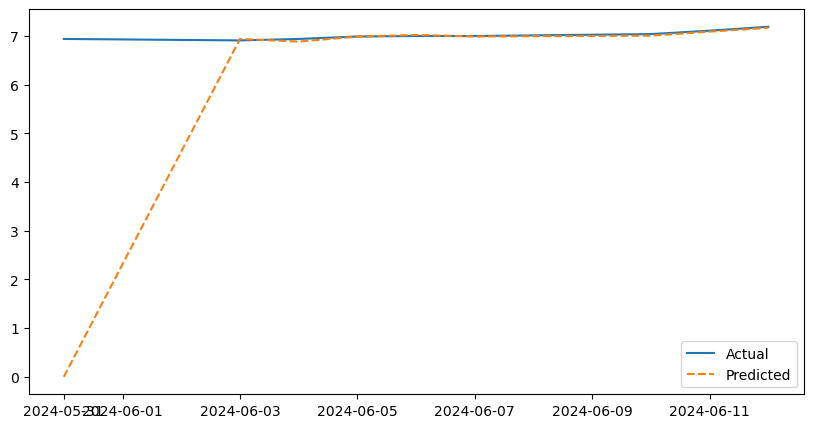

In [14]:
# Forecast future values
forecast = model_fit.forecast(steps=5)
print(forecast)

# Predict in-sample values
pred = model_fit.predict(start=0,end=len(raw)-1)
raw['predicted'] = pred

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(raw['weight'], label='Actual')
plt.plot(raw['predicted'], label='Predicted', linestyle='--')
plt.legend()
plt.show()


In [15]:
def holding_analysis(df,etfname,holding_name): # function for holding analysis
    print('ETF NAME :- ',etfname)
    
    print('Holding :-',holding_name)
    
    temp=df[df['etfname']==etfname]
    main=temp[temp['ticker']==holding_name]
    main['date']=main['date'].apply(str_to_date)
    main['date']=pd.to_datetime(main['date'])
    raw=main[['date','weight']]
    raw.set_index('date',inplace=True)
    raw["weight"]=raw["weight"].astype(float)
    
    model = ARIMA(raw['weight'], order=(1, 1, 1))  # Example parameters (p=1, d=1, q=1)
    model_fit = model.fit()
    
    
    forecast = model_fit.forecast(steps=1)
    print(forecast[forecast.keys()[0]])
    
    
    temp = {'holding': holding_name, 'date': forecast.keys()[0], 'weight': forecast[forecast.keys()[0]]}
    
    
    return temp
    
    
    '''pred = model_fit.predict(start=0,end=len(raw)-1)
    raw['predicted'] = pred

    # Plot the actual vs predicted values
    plt.figure(figsize=(15, 5))
    plt.plot(raw['weight'], label='Actual')
    plt.plot(raw['predicted'], label='Predicted', linestyle='--')
    plt.legend()
    plt.show()'''
    
    
    

In [16]:
holding_list=get_holdings(etf_names[0]) # Getting holding list
holding_list 

['MSFT',
 'AAPL',
 'NVDA',
 'AMZN',
 'META',
 'GOOGL',
 'GOOG',
 'BRKB',
 'LLY',
 'JPM',
 'AVGO',
 'XOM',
 'TSLA',
 'UNH',
 'V',
 'PG',
 'MA',
 'COST',
 'JNJ',
 'HD',
 'MRK',
 'ABBV',
 'CVX',
 'WMT',
 'NFLX',
 'BAC',
 'AMD',
 'KO',
 'PEP',
 'QCOM',
 'CRM',
 'TMO',
 'WFC',
 'LIN',
 'ADBE',
 'DIS',
 'CSCO',
 'MCD',
 'ORCL',
 'GE',
 'AMAT',
 'ABT',
 'TXN',
 'ACN',
 'VZ',
 'CAT',
 'DHR',
 'NEE',
 'AMGN',
 'PFE',
 'INTU',
 'CMCSA',
 'PM',
 'IBM',
 'GS',
 'RTX',
 'UNP',
 'ISRG',
 'MU',
 'SPGI',
 'AXP',
 'COP',
 'NOW',
 'HON',
 'ETN',
 'UBER',
 'BKNG',
 'INTC',
 'T',
 'LOW',
 'ELV',
 'PGR',
 'MS',
 'LRCX',
 'C',
 'TJX',
 'VRTX',
 'ADI',
 'NKE',
 'SYK',
 'BSX',
 'CB',
 'SCHW',
 'MDT',
 'BLK',
 'REGN',
 'KLAC',
 'MMC',
 'PLD',
 'BA',
 'LMT',
 'CI',
 'ADP',
 'UPS',
 'DE',
 'PANW',
 'MDLZ',
 'TMUS',
 'AMT',
 'SBUX',
 'FI',
 'SO',
 'BX',
 'CMG',
 'SNPS',
 'BMY',
 'MO',
 'GILD',
 'DUK',
 'APH',
 'CDNS',
 'ZTS',
 'WM',
 'ICE',
 'CL',
 'FCX',
 'ANET',
 'CVS',
 'MCK',
 'TDG',
 'TT',
 'CME',
 'EOG',
 '

In [17]:
df1=pd.DataFrame({
    'holding':[],
    'date':[],
    'weight':[],
})

In [19]:

a=holding_analysis(df,etf_names[0],holding_list[0]) 

ETF NAME :-  IVV
Holding :- MSFT
7.256416451116476


C:\Users\mohni\AppData\Local\Temp\ipykernel_19752\778037319.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['date']=main['date'].apply(str_to_date)
C:\Users\mohni\AppData\Local\Temp\ipykernel_19752\778037319.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['date']=pd.to_datetime(main['date'])
C:\Users\mohni\AppData\Local\Temp\ipykernel_19752\778037319.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [20]:
def holding_analysis_details(etfname):
    newdf=pd.DataFrame({
    'holding':[],
    'date':[],
    'weight':[],
    'price':[],
    })
    holding_list=get_holdings(etfname)
    for i in holding_list:
        temp=holding_analysis(df,etfname,i)
        t1=holding_analysis1(df,etfname,i)
        temp['price']=t1['price']
        newdf = newdf._append(temp, ignore_index = True)
    return newdf

In [21]:
df1

,holding,date,weight


In [104]:
a=holding_analysis_details(etf_names[0])

ETF NAME :-  IVV
Holding :- MSFT
7.256416451116476
ETF NAME :-  IVV
Holding :- MSFT


C:\Users\mohni\AppData\Local\Temp\ipykernel_6424\778037319.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['date']=main['date'].apply(str_to_date)
C:\Users\mohni\AppData\Local\Temp\ipykernel_6424\778037319.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['date']=pd.to_datetime(main['date'])
C:\Users\mohni\AppData\Local\Temp\ipykernel_6424\778037319.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

446.5321844154257
ETF NAME :-  IVV
Holding :- AAPL
6.812092907856927
ETF NAME :-  IVV
Holding :- AAPL


C:\Users\mohni\AppData\Local\Temp\ipykernel_6424\778037319.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['date']=main['date'].apply(str_to_date)
C:\Users\mohni\AppData\Local\Temp\ipykernel_6424\778037319.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['date']=pd.to_datetime(main['date'])
C:\Users\mohni\AppData\Local\Temp\ipykernel_6424\778037319.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

214.26490940298234
ETF NAME :-  IVV
Holding :- NVDA
6.834160191443063
ETF NAME :-  IVV
Holding :- NVDA


C:\Program Files\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mohni\AppData\Local\Temp\ipykernel_6424\3910239729.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['date']=main['date'].apply(str_to_date)
C:\Users\mohni\AppData\Local\Temp\ipykernel_6424\3910239729.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['date']=pd.t

ValueError: could not convert string to float: '1,096.33'

In [93]:
print(a)

     holding                 date     weight
0       MSFT  2024-06-13 00:00:00  12.580854
1       AAPL  2024-06-13 00:00:00  11.888357
2       NVDA  2024-06-13 00:00:00  11.910817
3       AMZN  2024-06-13 00:00:00   6.578691
4       META  2024-06-13 00:00:00   4.315453
..       ...                  ...        ...
503    UBFUT                    0   0.000000
504      FOX                    0   0.000000
505      NWS                    0   0.000000
506     ESM4                    0   0.000000
507  ETD_USD                    0   0.000000

[508 rows x 3 columns]


In [94]:
a.tail(20)

,holding,date,weight
488,ETSY,2024-06-13 00:00:00,0.01
489,MKTX,0,0.00
490,AAL,0,0.00
491,FRT,0,0.00
492,RL,2024-06-13 00:00:00,0.02
493,BEN,0,0.00
494,GL,0,0.00
495,IVZ,0,0.00
496,NCLH,2024-06-13 00:00:00,0.03
497,PAYC,2024-06-13 00:00:00,0.01


In [49]:
temp1=main[['date','price']]
temp1.set_index('date',inplace=True)
#temp1['price']=temp1['price'].apply(str_to_int)
#type(temp1['price'])

In [58]:
import locale
from locale import atof
locale.setlocale(locale.LC_NUMERIC, '')
temp1['price']=temp1['price'].apply(atof)

AttributeError: 'float' object has no attribute 'replace'

In [59]:
temp1["price"]

date
2024-05-31    415.13
2024-06-03    413.52
2024-06-04    416.07
2024-06-05    424.01
2024-06-06    424.52
2024-06-07    423.85
2024-06-10    427.87
2024-06-11    432.68
2024-06-12    441.06
Name: price, dtype: float64

In [100]:
# Define the model
model = ARIMA(temp1['price'], order=(1, 1, 1))  # Example parameters (p=1, d=1, q=1)

# Fit the model
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                    9
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -22.117
Date:                Wed, 19 Jun 2024   AIC                             50.235
Time:                        22:09:05   BIC                             50.473
Sample:                    05-31-2024   HQIC                            48.627
                         - 06-12-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0681      0.582      0.117      0.907      -1.073       1.209
ma.L1          0.9995    355.165      0.003      0.998    -695.111     697.110
sigma2        11.0448   3924.039      0.003      0.9

C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


2024-06-13    446.532184
2024-06-14    446.904859
2024-06-17    446.930240
2024-06-18    446.931968
2024-06-19    446.932086
Freq: B, Name: predicted_mean, dtype: float64


C:\Users\mohni\AppData\Local\Temp\ipykernel_6424\4206471474.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['predicted'] = pred


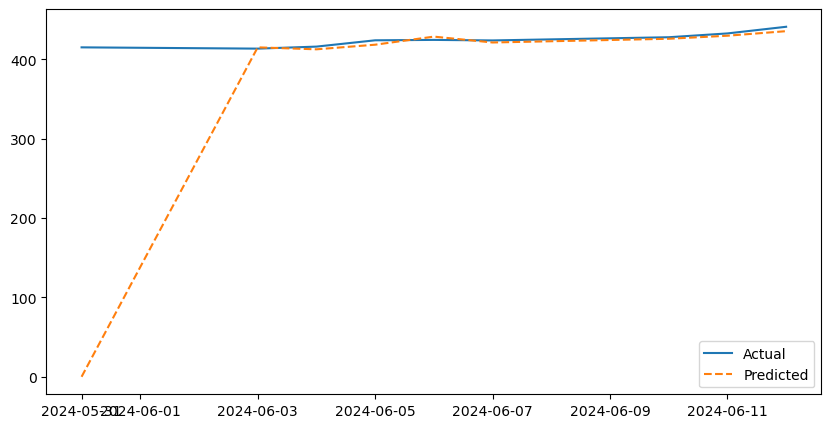

In [101]:
# Forecast future values
forecast = model_fit.forecast(steps=5)                                                     
print(forecast)

# Predict in-sample values
pred = model_fit.predict(start=0,end=len(temp1)-1)
temp1['predicted'] = pred

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(temp1['price'], label='Actual')
plt.plot(temp1['predicted'], label='Predicted', linestyle='--')
plt.legend()
plt.show()

In [74]:
def holding_analysis1(df,etfname,holding_name): # function for holding analysis
    print('ETF NAME :- ',etfname)
    
    print('Holding :-',holding_name)
    
    temp=df[df['etfname']==etfname]
    main=temp[temp['ticker']==holding_name]
    main['date']=main['date'].apply(str_to_date)
    main['date']=pd.to_datetime(main['date'])
    temp1=main[['date','price']]
    temp1.set_index('date',inplace=True)
    locale.setlocale(locale.LC_NUMERIC, '')
    temp1['price']=temp1['price'].apply(atof)
    
    print(temp1)

    model = ARIMA(temp1['price'], order=(1, 1, 1))  # Example parameters (p=1, d=1, q=1)
    model_fit = model.fit()
    
    forecast = model_fit.forecast(steps=1)
    print(forecast)
    
    p_price={'price':forecast}
    
    return p_price

In [44]:
def str_to_int(s):
    
    if isinstance(s, str):
        raw_num=s.replace(',','')
    
        return raw_num.astype(float)
    else:
        return s
    

In [45]:
str_to_int('537,78.90')

AttributeError: 'str' object has no attribute 'astype'

In [97]:
holding_analysis1(df,etf_names[3],holding_list[0])

ETF NAME :-  IJH
Holding :- MSFT
Empty DataFrame
Columns: [price]
Index: []


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [76]:
# try

In [98]:
holding_list1=get_holdings(etf_names[3])
len(holding_list1)

410

In [99]:
holding_list=get_holdings(etf_names[3])
temp=df[df['etfname']==etf_names[3]]
main=temp[temp['ticker']==holding_list[0]]
print(holding_list[0])

CSL


In [85]:
temp['ticker'].unique()

array(['CSL', 'GDDY', 'WSM', 'EME', 'PSTG', 'RS', 'LII', 'OC', 'BURL',
       'WSO', 'RPM', 'RGA', 'THC', 'GGG', 'MANH', 'NVT', 'NBIX', 'IBKR',
       'DKS', 'BLD', 'OVV', 'UTHR', 'FNF', 'TOL', 'FND', 'SWAV', 'XPO',
       'WPC', 'CASY', 'SRPT', 'RNR', 'GLPI', 'USFD', 'ACM', 'CELH', 'WMS',
       'BJ', 'ELS', 'FIX', 'TXRH', 'CHRD', 'AMH', 'WWD', 'LECO', 'TTEK',
       'XTSLA', 'DT', 'ITT', 'CLH', 'SAIA', 'WING', 'PFGC', 'CW', 'ONTO',
       'SCI', 'ALLY', 'EWBC', 'ELF', 'LAMR', 'LSCC', 'SNX', 'CHK', 'CCK',
       'AR', 'RRX', 'NLY', 'CNM', 'ATR', 'JLL', 'REXR', 'SKX', 'CUBE',
       'WTRG', 'CACI', 'CROX', 'TREX', 'ALV', 'CG', 'ERIE', 'MEDP', 'RRC',
       'KBR', 'DCI', 'FHN', 'TPX', 'FBIN', 'CHDN', 'WFRD', 'GPK', 'EHC',
       'DINO', 'CLF', 'LNW', 'X', 'RBC', 'UNM', 'AFG', 'KNSL', 'ARMK',
       'BWXT', 'RGLD', 'PR', 'NYT', 'TTC', 'CHE', 'MUSA', 'SWN', 'ORI',
       'EQH', 'SF', 'GNTX', 'SFM', 'EXP', 'WEX', 'MKSI', 'OHI', 'AYI',
       'PRI', 'AA', 'JEF', 'WCC', 'EGP', 'CGNX', 'AXTA'